# Allstate Insurance Claims Severity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.shape

(188318, 132)

## EDA

In [3]:
# checking for missing values
df.isnull().sum().sum()

0

In [4]:
# split categorical and continuous variables 
cat_cols = [c for c in df.columns if 'cat' in c]
con_cols = [c for c in df.columns if 'con' in c]

**Explore Target Variable**

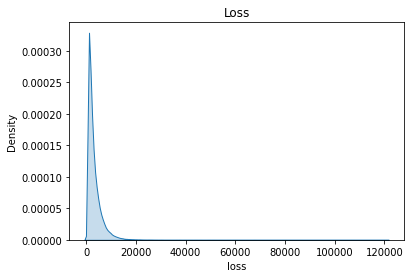

In [5]:
plt.title('Loss')
sns.kdeplot(df.loss, shade=True);

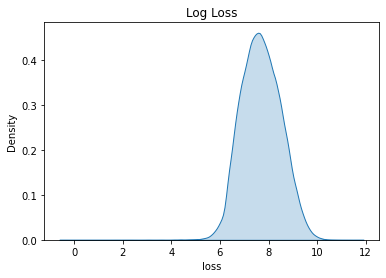

In [6]:
plt.title('Log Loss')
sns.kdeplot(np.log(df.loss), shade=True);

## Continuous Feature Analysis

### Boxplots

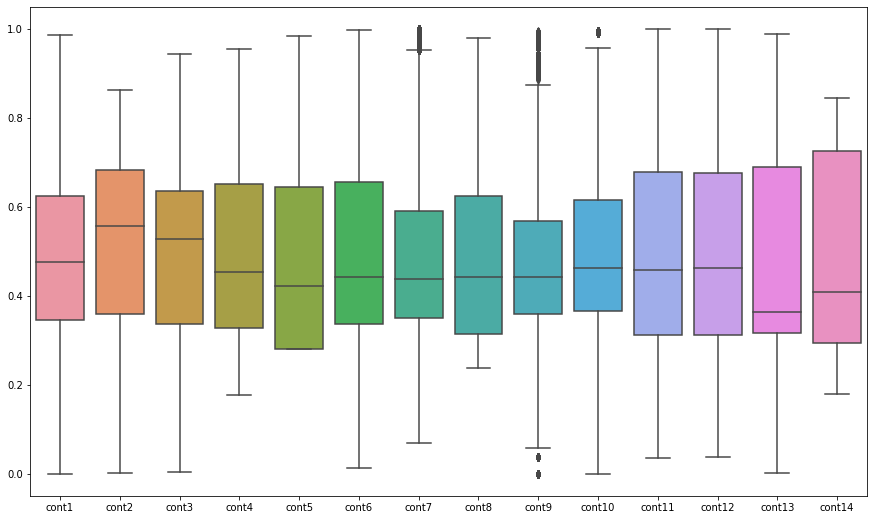

In [7]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df[con_cols]);

### Correlation

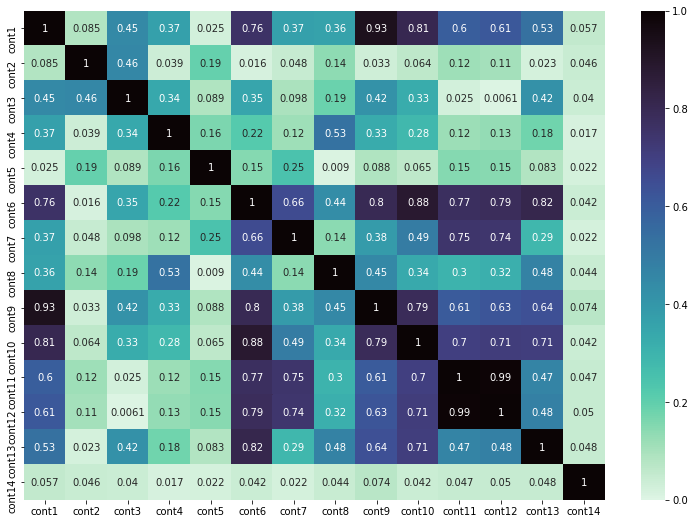

In [8]:
#con_cols.append('loss')
corr = df[con_cols].corr().abs()

plt.figure(figsize=(13,9))
sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap='mako_r')
plt.show()

In [9]:
# variables with high correlation
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
theshold = .85
high_corr = [c for c in upper.columns if any(upper[c]>theshold)]
high_corr

['cont9', 'cont10', 'cont12']

## Categorical Feature Analysis

In [10]:
num_classes = pd.DataFrame((df[cat_cols].nunique()))
num_classes

,0
cat1,2
cat2,2
cat3,2
cat4,2
cat5,2
...,...
cat112,51
cat113,61
cat114,19
cat115,23


In [11]:
num_classes[0].value_counts().sort_index()

2      72
3       4
4      12
5       3
7       4
8       3
9       1
11      1
13      1
15      1
16      2
17      2
19      2
20      2
23      1
51      1
61      1
84      1
131     1
326     1
Name: 0, dtype: int64

## Feature Engineering

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

### Remove Highly Correlated Columns

In [13]:
X = df.drop(columns=['id','loss'])
y = df.loss

In [14]:
X = X.drop(columns=high_corr)
con_cols = [c for c in con_cols if c not in high_corr]

### Transform Features
 - scale continuous features
 - encode categorical features

In [15]:
transformer = ColumnTransformer(
            [('cat', OneHotEncoder(sparse=True), list(cat_cols)),
            ('cont', StandardScaler(), list(con_cols))])
X = transformer.fit_transform(X)
X.shape

(188318, 1150)

# Modelling

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [18]:
def model(regressor):
    start = time.time()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print('mae: ', mae)
    print('Time: ', (time.time()-start))
    return y_pred

In [19]:
model(LinearRegression())

mae:  1301.4950927951704
Time:  90.82232809066772


In [20]:
model(Lasso())

mae:  1301.3246324289337
Time:  90.1373302936554


In [21]:
model(Ridge())

mae:  1300.3320668817023
Time:  10.600502967834473


In [22]:
model(DecisionTreeRegressor())

mae:  1725.9215377194846
Time:  338.48438572883606


In [23]:
model(AdaBoostRegressor())

mae:  2149.823131504554
Time:  54.030763149261475


In [24]:
#Passes Random Forest Benchmark on Kaggle
model(XGBRegressor())

mae:  1205.8440872233243
Time:  87.61053991317749
